# Notizen:

- teste verschiedene Werte für m
- möglicherweise DTW geeignet für Outlier Detection innerhalb der Cluster
    
    > for C : Cluster
        >> for x : C
            >>> membership(x in C) >= grenze ? member : Outlier
            <br> 

- GridSearch für KernelPCA (gamma, alpha)
- 

---

### Import und Konfiguration

- Import der Module
- Einlesen der Daten
- Preprocessing der Daten
- Konfiguration der Ausgabeparameter
- Cluster Linkage
    - fcm(cluster_centers)
    - plot lines **(** center_i, center_j, alpha=memebership(i, j) **)**

In [13]:
import numpy as np

# Import der Time-Series-Bibliotheken
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tslearn.clustering import TimeSeriesKMeans

# Import der Pakete für die Dimensionsreduktion
from sklearn.manifold import TSNE
from sklearn.decomposition import KernelPCA

# Import der Module für die Cluster-Analyse
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer as kmpp_init
from pyclustering.cluster.elbow import elbow
from clustermodels.utils.mspecdata import MSData

import matplotlib.pyplot as plt

from pprint import pprint
import warnings

# Ignorieren der Numpy-Warnungen
np.warnings = warnings

# Einlesen des Datensatzes als MSData
data = MSData('./data/orig_0808.csv')
data_arr = data.get_array_like()

scaled_data = TimeSeriesScalerMinMax(value_range=(0,1)).fit_transform(data_arr).reshape(data_arr.shape)
# scaled_data = TimeSeriesScalerMeanVariance(mu = 0, std = 1).fit_transform(data_arr).reshape(data_arr.shape)

plt.style.use('seaborn-v0_8-whitegrid')

# Berechne zu einem gegebenen Element elem, zu welchem Cluster es zugehörig ist. arr ist eine Liste von Clustern
def cluster_id(elem, arr):
    n = len(arr)
    for i in range(n):
        if elem in arr[i]:
            return i

### Konfiguration der Cluster-Analyse

In [14]:
################################
############# INIT #############
################################


k = 5  # Anzahl der Cluster
X = scaled_data 
X_arr = np.arange(X.shape[1])  # x-Achse zum Plotten der Daten 


### Durchführung der Cluster-Analsye

In [15]:
################################
########### CLUSTER ############
################################


# Initialsierung und Durchführung einer Cluster-Analyse mit FCM
initial_centers = kmpp_init(X, k, kmpp_init.FARTHEST_CENTER_CANDIDATE).initialize()
fcm_instance = fcm(X, initial_centers, m=2)
fcm_instance.process()

# Ergebnisse des Cluster-Verfahrens
membership = np.array(fcm_instance.get_membership())
centers = fcm_instance.get_centers()
clusters = fcm_instance.get_clusters()
ids = np.array([cluster_id(i, clusters) for i in range(len(X))])

# Darstellungsparamter und Darstellung (bei Bedarf aktivieren)
# num_rows = 7
# num_cols = 8
# fig, axs = plt.subplots(num_rows, num_cols, figsize =(35, 20))

# for row in range(num_rows):
#     for col in range(num_cols):
#         axs[row, col].plot(X_arr, X[row*num_cols+col+10].T)

### Durchführung der Elbow-Auswertung

4.56


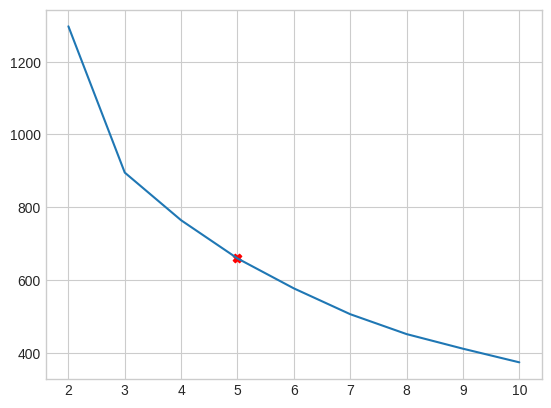

In [16]:
################################
######### EVALUATION ###########
################################


k_min = 2  # Start der Ellenbogen-Auswertung
k_max = 10  # Beginn der EllenbogenAuswertung
el = elbow(X, k_min, k_max)

wce = np.zeros(k_max - k_min + 1)
k_mean = 0
n_max = 100

for i in range(n_max):
    el.process()
    wce = wce + el.process().get_wce()
    k_mean += el.get_amount()
wce /= n_max
k_avg = k_mean/(n_max)
print(k_avg)
plt.plot(list(range(k_min, k_max + 1)), wce)
plt.scatter([round(k_avg)], wce[round(k_avg)-2], c="red", marker="X")

In [17]:
# plt.plot(list(range(k_min, k_max + 1)), wce)
# plt.scatter([round(k_avg)], wce[round(k_avg)-2], c="red", marker="X")
# plt.savefig('elbow2-10-467.png', dpi=500)


### Farbpalette

In [18]:
color_palette = {0 : "purple", 1 : "blue", 2 : "green", 3 : "orange", 4 : "red", 5 : "red"}
color_palette = {
    1: "purple",
    3: "blue",
    0: "green",
    2: "orange",
    4: "red",
    5: "yellow",
    6: "cyan",
    7: "magenta",
    8: "#FF1493",
    9: "brown",
    10: "teal",
    11: "#6A5ACD", 
    12: "#808000",
    13: "maroon"
}

### Darstellung der Cluster-Ergebnisse

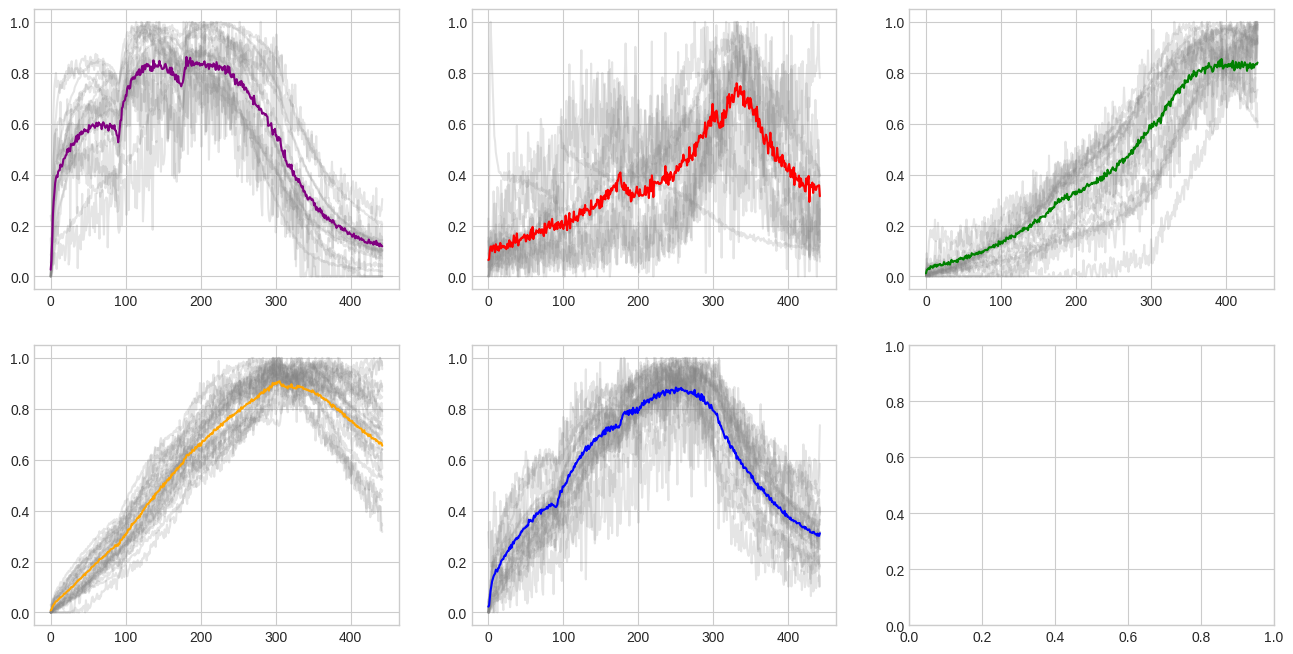

In [19]:
################################
########## PLOTTING ############
################################

fig, axs = plt.subplots(2, 3, figsize =(16, 8))
axs[0, 0].plot(X_arr, X[np.where(ids == 1)[0]].T, 'gray', alpha=.2)
axs[0, 0].plot(X_arr, centers[1], color_palette.get(1))
axs[0, 1].plot(X_arr, X[np.where(ids == 4)[0]].T, 'gray', alpha=.2)
axs[0, 1].plot(X_arr, centers[4], color_palette.get(4))
axs[0, 2].plot(X_arr, X[np.where(ids == 0)[0]].T, 'gray', alpha=.2)
axs[0, 2].plot(X_arr, centers[0], color_palette.get(0))
axs[1, 0].plot(X_arr, X[np.where(ids == 2)[0]].T, 'gray', alpha=.2)
axs[1, 0].plot(X_arr, centers[2], color_palette.get(2))
axs[1, 1].plot(X_arr, X[np.where(ids == 3)[0]].T, 'gray', alpha=.2)
axs[1, 1].plot(X_arr, centers[3], color_palette.get(3))
# axs[1, 2].plot(X_arr, X[np.where(ids == 5)[0]].T, 'gray', alpha=.2)
# axs[1, 2].plot(X_arr, centers[5], color_palette.get(5))
# axs[2, 0].plot(X_arr, X[np.where(ids == 6)[0]].T, 'gray', alpha=.2)
# axs[2, 0].plot(X_arr, centers[6], color_palette.get(6))
# axs[2, 1].plot(X_arr, X[np.where(ids == 7)[0]].T, 'gray', alpha=.2)
# axs[2, 1].plot(X_arr, centers[7], color_palette.get(7))
# axs[2, 2].plot(X_arr, X[np.where(ids == 8)[0]].T, 'gray', alpha=.2)
# axs[2, 2].plot(X_arr, centers[8], color_palette.get(8))
# axs[3, 0].plot(X_arr, X[np.where(ids == 9)[0]].T, 'gray', alpha=.2)
# axs[3, 0].plot(X_arr, centers[9], color_palette.get(9))
# axs[3, 1].plot(X_arr, X[np.where(ids == 10)[0]].T, 'gray', alpha=.2)
# axs[3, 1].plot(X_arr, centers[10], color_palette.get(10))
# axs[3, 2].plot(X_arr, X[np.where(ids == 11)[0]].T, 'gray', alpha=.2)
# axs[3, 2].plot(X_arr, centers[11], color_palette.get(11))
# axs[4, 0].plot(X_arr, X[np.where(ids == 12)[0]].T, 'gray', alpha=.2)
# axs[4, 0].plot(X_arr, centers[12], color_palette.get(12))
# axs[4, 1].plot(X_arr, X[np.where(ids == 13)[0]].T, 'gray', alpha=.2)
# axs[4, 1].plot(X_arr, centers[13], color_palette.get(13))
# axs[4, 2].plot(X_arr, X[np.where(ids == 14)[0]].T, 'gray', alpha=.2)
# axs[4, 2].plot(X_arr, centers[14], color_palette.get(14))

#plt.savefig("cluster-14", dpi=500)

### Darstellung des Datensatzes mit T-SNE

- Datensatz ist 91D
- Darstellung in 2D mittels T-SNE
- gewichtete Färbung nach Cluster-Ergebnissen von oben

In [20]:
################################
############# TSNE #############
################################

# Zugehörigkeit der Centroide
# Entspricht der Einheitsmatrix
membership_extension = [[1 if i == j else 0 for i in range(k)] for j in range(k)]


# Initialiserung einer TSNE-INstanz
m = TSNE(learning_rate='auto', n_components=2, perplexity=15)
tsne_features = m.fit_transform(X)
X_tsne = tsne_features


plt.style.use('seaborn-v0_8-whitegrid')
max_m = [np.max(m) for m in membership]  # Der Membership-Wert eines i-ten Elements zum Cluster, zu dem es zugehörig ist



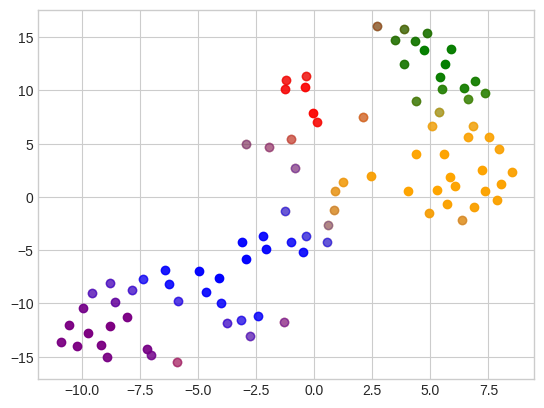

In [21]:

for i, x in enumerate(X_tsne):
    plt.scatter(x[0], x[1], color=color_palette.get(0), alpha=membership[i][0])
    plt.scatter(x[0], x[1], color=color_palette.get(1), alpha=membership[i][1])
    plt.scatter(x[0], x[1], color=color_palette.get(4), alpha=membership[i][4])
    # plt.scatter(x[0], x[1], color=color_palette.get(5), alpha=membership[i][5])
    plt.scatter(x[0], x[1], color=color_palette.get(2), alpha=membership[i][2])
    plt.scatter(x[0], x[1], color=color_palette.get(3), alpha=membership[i][3])
#     plt.scatter(x[0], x[1], color=color_palette.get(6), alpha=membership[i][6])
#     plt.scatter(x[0], x[1], color=color_palette.get(7), alpha=membership[i][7])
#     plt.scatter(x[0], x[1], color=color_palette.get(8), alpha=membership[i][8])
#     plt.scatter(x[0], x[1], color=color_palette.get(9), alpha=membership[i][9])
#     plt.scatter(x[0], x[1], color=color_palette.get(10), alpha=membership[i][10])
#     plt.scatter(x[0], x[1], color=color_palette.get(11), alpha=membership[i][11])
#     plt.scatter(x[0], x[1], color=color_palette.get(12), alpha=membership[i][12])
#     plt.scatter(x[0], x[1], color=color_palette.get(13), alpha=membership[i][13])
# #plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=ids, cmap='rainbow')
#plt.show()

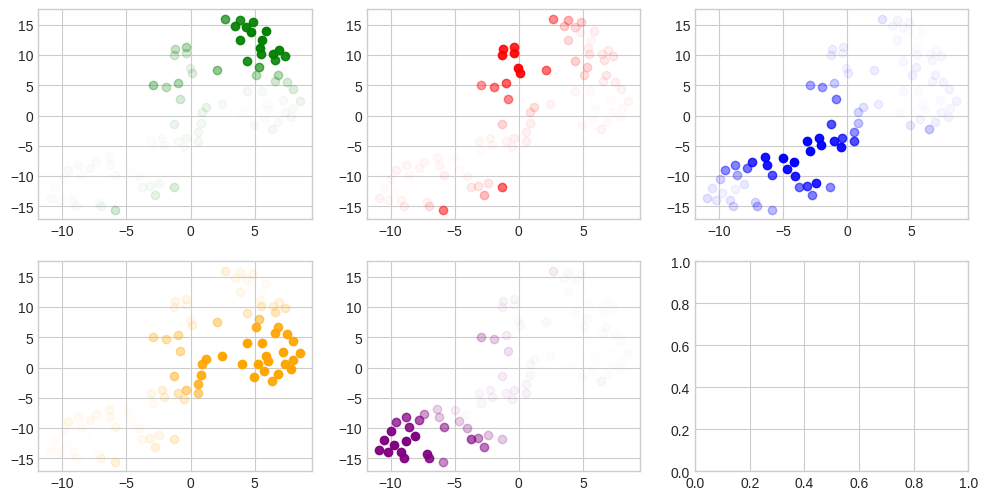

In [22]:
fig, axs = plt.subplots(2, 3, figsize =(12, 6))

for i, x in enumerate(X_tsne):
    axs[0, 0].scatter(x[0], x[1], color=color_palette.get(0), alpha=membership[i][0]**.7)
    # axs[1, 2].scatter(x[0], x[1], color=color_palette.get(5), alpha=membership[i][5])
    axs[0, 2].scatter(x[0], x[1], color=color_palette.get(3), alpha=membership[i][3]**.7)
    axs[1, 0].scatter(x[0], x[1], color=color_palette.get(2), alpha=membership[i][2]**.7)
    axs[1, 1].scatter(x[0], x[1], color=color_palette.get(1), alpha=membership[i][1]**.7)
    axs[0, 1].scatter(x[0], x[1], color=color_palette.get(4), alpha=membership[i][4]**.7)

### TSNE für {Menge, Centren}

In [23]:
################################
############# TSNE #############
################################

# Hier werden die Centroide dem Datensatz hinzugefügt und der erweiterte Datensatz mittels TSNE veranschaulicht

X_c = np.vstack((centers, X))

membership_extension = [[1 if i == j else 0 for i in range(k)] for j in range(k)]
membership_c = np.vstack((membership_extension, membership))


m_c = TSNE(learning_rate='auto', n_components=2, perplexity=19.1, early_exaggeration=25)
tsne_features_c = m_c.fit_transform(X_c)
X_c_tsne = tsne_features_c



NameError: name 'matr' is not defined

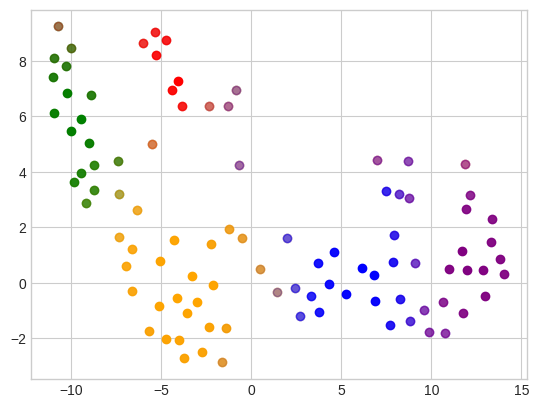

In [24]:
for i, x in enumerate(X_c_tsne):
    plt.scatter(x[0], x[1], color=color_palette.get(0), alpha=membership_c[i][0])
    plt.scatter(x[0], x[1], color=color_palette.get(4), alpha=membership_c[i][4])
    plt.scatter(x[0], x[1], color=color_palette.get(2), alpha=membership_c[i][2])
    plt.scatter(x[0], x[1], color=color_palette.get(3), alpha=membership_c[i][3])
    plt.scatter(x[0], x[1], color=color_palette.get(1), alpha=membership_c[i][1])

# Plot der Linkage
for i in range(k):
    for j in range(k):
        if i == j:
            continue
        plt.plot([X_c_tsne[i][0], X_c_tsne[j][0]], [X_c_tsne[i][1], X_c_tsne[j][1]], color = color_palette.get(i), alpha=matr[i][j]/matr[i][i]*np.sqrt(1), linewidth=15.0)


# Plot der Centers
for i, x in enumerate(X_c_tsne[0:k]):
    plt.scatter(x[0], x[1], color=color_palette.get(i))

#plt.savefig("tsne-k5-p43-linkage", dpi=500)

### Darstellung der einzelnen Clusterverteilungen

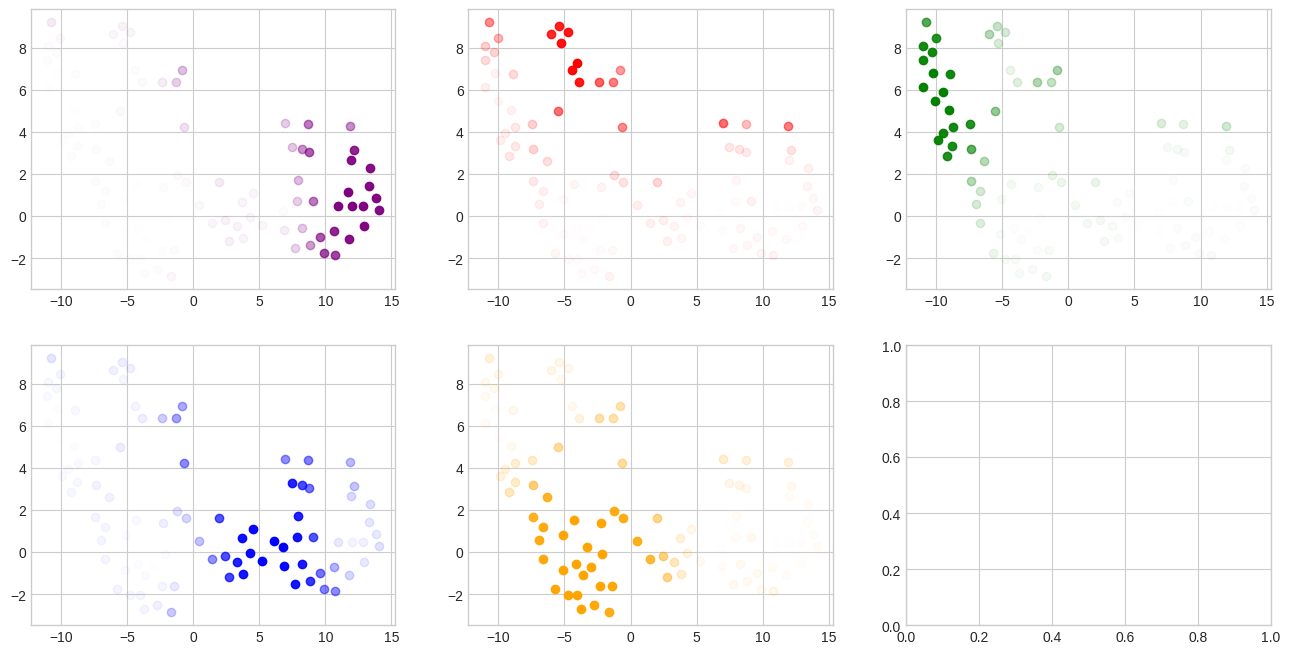

In [25]:
fig, axs = plt.subplots(2, 3, figsize =(16, 8))

for i, x in enumerate(X_c_tsne):
    axs[0, 2].scatter(x[0], x[1], color=color_palette.get(0), alpha=membership_c[i][0]**.7)
    axs[0, 0].scatter(x[0], x[1], color=color_palette.get(1), alpha=membership_c[i][1]**.7)
    axs[1, 1].scatter(x[0], x[1], color=color_palette.get(2), alpha=membership_c[i][2]**.7)
    axs[1, 0].scatter(x[0], x[1], color=color_palette.get(3), alpha=membership_c[i][3]**.7)
    axs[0, 1].scatter(x[0], x[1], color=color_palette.get(4), alpha=membership_c[i][4]**.7)

#plt.savefig("tsne-k5-p137-einzeln", dpi=500)

### Darstellung der Clusterzusammenhänge

In [28]:
# Funktion zur Berechnung der Fuzzy-Cluster-Linkage
def affiliation_matrix(clusters, memberships, threshold=0):
    clustered_memberships = [memberships[c] for i, c in enumerate(clusters)]
    filtered_memberships = clustered_memberships.copy()
    if threshold:
        filtered_memberships = [c_m[np.where(c_m[: , i] >= threshold)] for i, c_m in enumerate(clustered_memberships)]
    print(filtered_memberships[0].shape)
    return [np.mean(f_m, axis=0) for f_m in filtered_memberships]


matr = affiliation_matrix(clusters, membership, threshold=.0)

clustered_memberships = [membership[c] for i, c in enumerate(clusters)]




(17, 5)


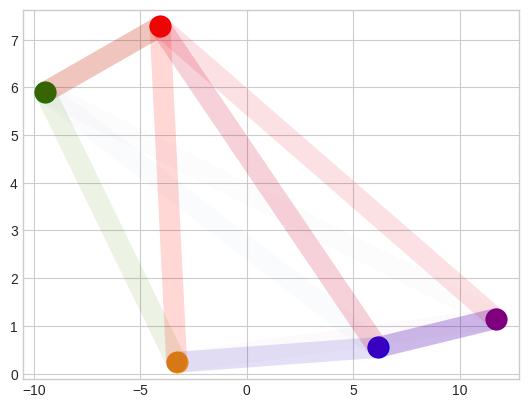

In [29]:
# Plot der Linkage
for i in range(k):
    for j in range(k):
        if i == j:
            continue
        plt.plot([X_c_tsne[i][0], X_c_tsne[j][0]], [X_c_tsne[i][1], X_c_tsne[j][1]], color = color_palette.get(i), alpha=matr[i][j]/matr[i][i]*np.sqrt(1), linewidth=15)


# Plot der Centers
for i, x in enumerate(X_c_tsne[0:k]):
    plt.scatter(x[0], x[1], color=color_palette.get(i), linewidths=10)

#plt.savefig("linkage-p191-tresh75", dpi=500)

### Darstellung des Datensatzes mit Kernel-PCA

- Dimensionsreduktion
- Darstellung in 2D
- Färbung entspricht gewichteter Clusterzugerhörigkeit

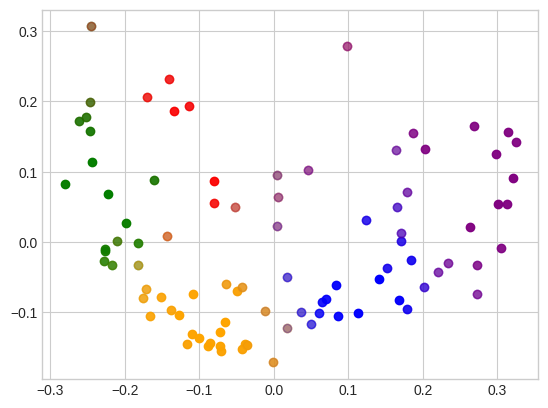

In [30]:

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=.001, fit_inverse_transform=True, alpha=2)
X_kpca = kernel_pca.fit_transform(X)

#plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=ids, cmap='brg')

for i, x in enumerate(X_kpca):
    plt.scatter(x[0], x[1], color=color_palette[0], alpha=membership[i][0])
    plt.scatter(x[0], x[1], color=color_palette[4], alpha=membership[i][4])
    # plt.scatter(x[0], x[1], color=color_palette[5], alpha=membership[i][5])
    plt.scatter(x[0], x[1], color=color_palette[2], alpha=membership[i][2])
    plt.scatter(x[0], x[1], color=color_palette[3], alpha=membership[i][3])
    plt.scatter(x[0], x[1], color=color_palette[1], alpha=membership[i][1])

### Experimentell!

Die Idee war es, den T-SNE-Datensatz selber zu Clustern um die vorherigen Einfärbungen auf Grundlage von fcm auf den mehrdimensionalen Daten zu verifizieren. Diesen Ansatz habe ich in der Bachelor-Arbeit nicht weiter verfolgt und der Code ist dementsprechend nicht angepasst

### Cluster-Verfahren auf dem T-SNE-Datensatz

- Cluster im 2D T-SNE-Datensatz
- Färbung zum Vergleich

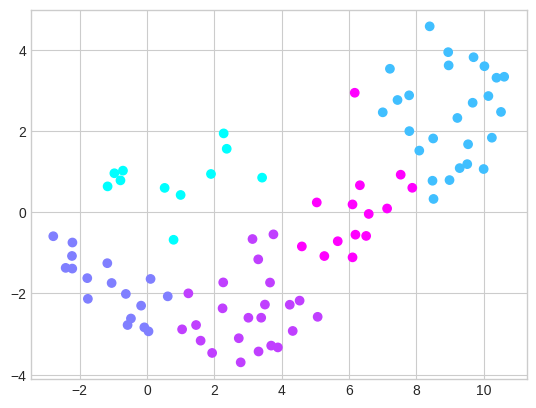

In [ ]:
################################
########### CLUSTER ############
################################

initial_centers = kmpp_init(X_tsne, k, kmpp_init.FARTHEST_CENTER_CANDIDATE).initialize()
fcm_instance = fcm(X_tsne, initial_centers)
fcm_instance.process()

tsne_centers = fcm_instance.get_centers()
tsne_clusters = fcm_instance.get_clusters()
tsne_ids = [cluster_id(i, tsne_clusters) for i in range(len(X_tsne))]
X_arr = np.arange(len(X_tsne))

centers_np = np.array(tsne_centers)
ids = [cluster_id(i, tsne_clusters) for i in range(len(X_tsne))]

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=tsne_ids, cmap='cool')

### Cluster-Analyse mit DTW

- K-Means auf dem skalierten Datensatz
- Ähnlichkeitsmaß = DTW-Abstand

In [31]:

model = TimeSeriesKMeans(n_clusters=11, metric="dtw", max_iter=10, random_state=0)
ts_dtw = model.fit(X)


### Darstellung der Clusterzentren durch DTW

- Clusterzentren farbig
- Members in grau

(91, 443)


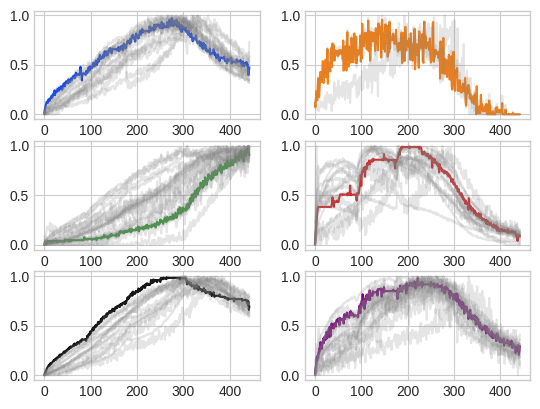

In [ ]:
dtw_centers = ts_dtw.cluster_centers_
dtw_shape = dtw_centers.shape

X_ = np.squeeze(ts_dtw._X_fit, axis=-1)
print(X_.shape)

X_arr = np.arange(dtw_shape[1])

dtw_centers = dtw_centers.reshape((dtw_shape[0], dtw_shape[1]))
dtw_clusters = ts_dtw.labels_


fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(X_arr, dtw_centers[0])
axs[0,0].plot(X_arr, X_[np.where(dtw_clusters == 0)[0]].T, 'gray', alpha=.2)
axs[0, 1].plot(X_arr, dtw_centers[1], 'tab:orange')
axs[0,1].plot(X_arr, X_[np.where(dtw_clusters == 1)[0]].T, 'gray', alpha=.2)
axs[1, 0].plot(X_arr, dtw_centers[2], 'tab:green')
axs[1,0].plot(X_arr, X_[np.where(dtw_clusters == 2)[0]].T, 'gray', alpha=.2)
axs[1, 1].plot(X_arr, dtw_centers[3], 'tab:red')
axs[1,1].plot(X_arr, X_[np.where(dtw_clusters == 3)[0]].T, 'gray', alpha=.2)
axs[2, 0].plot(X_arr, dtw_centers[4], 'black')
axs[2,0].plot(X_arr, X_[np.where(dtw_clusters == 4)[0]].T, 'gray', alpha=.2)
axs[2, 1].plot(X_arr, dtw_centers[5], 'purple')
axs[2,1].plot(X_arr, X_[np.where(dtw_clusters == 5)[0]].T, 'gray', alpha=.2)

### elbow für DTW-Clustering

In [ ]:
# sse = []

# for _ in range(k_min, k_max):
#     print(_)
#     sse.append(TimeSeriesKMeans(n_clusters=_, metric="dtw", max_iter=10, random_state=0).fit(X).inertia_)

# print(sse)

### Darstellung von DTW-elbow

In [ ]:
# X_arr = np.arange(k_min, k_max)
# print(X_arr)
# plt.plot(X_arr, sse)

# #print(plt.style.available)

### Clusterverfahren mit softdtw als Metrik

- Clusterzentren mit K-Means in schwarz
- Clusterzentren mit softdtw farbig

In [ ]:
model = TimeSeriesKMeans(n_clusters=6, metric="softdtw", max_iter=10, random_state=12)
ts_dtw = model.fit(X)

dtw_centers = ts_dtw.cluster_centers_
dtw_shape = dtw_centers.shape

X_arr = np.arange(dtw_shape[1])
print(dtw_shape)
dtw_centers = dtw_centers.reshape((dtw_shape[0], dtw_shape[1]))

X_ = np.squeeze(ts_dtw._X_fit, axis=-1)

fcm_instance = fcm(X_, dtw_centers)
fcm_instance.process()

centers = fcm_instance.get_centers()
clusters = fcm_instance.get_clusters()
ids = np.array([cluster_id(i, clusters) for i in range(len(X))])

print(ids)

fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(X_arr, X_[np.where(ids == 0)[0]].T, 'gray', alpha=.2)
axs[0, 0].plot(X_arr, dtw_centers[0])
axs[0, 0].plot(X_arr, centers[0], 'black')
axs[0, 1].plot(X_arr, X_[np.where(ids == 1)[0]].T, 'gray', alpha=.2)
axs[0, 1].plot(X_arr, dtw_centers[1], 'tab:orange')
axs[0, 1].plot(X_arr, centers[1], 'black')
axs[1, 0].plot(X_arr, X_[np.where(ids == 2)[0]].T, 'gray', alpha=.2)
axs[1, 0].plot(X_arr, dtw_centers[2], 'tab:green')
axs[1, 0].plot(X_arr, centers[2], 'black')
axs[1, 1].plot(X_arr, X_[np.where(ids == 3)[0]].T, 'gray', alpha=.2)
axs[1, 1].plot(X_arr, dtw_centers[3], 'tab:red')
axs[1, 1].plot(X_arr, centers[3], 'black')
axs[2, 0].plot(X_arr, X_[np.where(ids == 4)[0]].T, 'gray', alpha=.2)
axs[2, 0].plot(X_arr, dtw_centers[4], 'brown')
axs[2, 0].plot(X_arr, centers[4], 'black')
axs[2, 1].plot(X_arr, X_[np.where(ids == 5)[0]].T, 'gray', alpha=.2)
axs[2, 1].plot(X_arr, dtw_centers[5], 'purple')
axs[2, 1].plot(X_arr, centers[5], 'black')
# axs[3, 0].plot(X_arr, X[np.where(ids == 6)[0]].T, 'gray', alpha=.2)
# axs[3, 0].plot(X_arr, dtw_centers[6], 'purple')
# axs[3, 0].plot(X_arr, centers[6], 'black')
# axs[3, 1].plot(X_arr, X[np.where(ids == 7)[0]].T, 'gray', alpha=.2)
# axs[3, 1].plot(X_arr, dtw_centers[7], 'purple')
# axs[3, 1].plot(X_arr, centers[7], 'black')

KeyboardInterrupt: 

### Rekursive Clusteranalyse

- erneutes Clustern eines Clusters
- Outlier Detection mittels Clustering

In [ ]:
X_sub = X_[np.where(ids == 1)]
print(X_sub.shape)
k_sub = 5

initial_centers_sub = kmpp_init(X_sub, k_sub , kmpp_init.FARTHEST_CENTER_CANDIDATE).initialize()
fcm_instance_sub = fcm(X_sub, initial_centers_sub)
fcm_instance_sub.process() 
fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(X_arr, X_sub[np.where(ids_sub == 0)[0]].T, 'gray', alpha=.2)
axs[0, 0].plot(X_arr, centers_sub[0], 'black')
axs[0, 1].plot(X_arr, X_sub[np.where(ids_sub == 1)[0]].T, 'gray', alpha=.2)
axs[0, 1].plot(X_arr, centers_sub[1], 'tab:orange')
axs[1, 0].plot(X_arr, X_sub[np.where(ids_sub == 2)[0]].T, 'gray', alpha=.2)
axs[1, 0].plot(X_arr, centers_sub[2], 'tab:orange')
axs[1, 1].plot(X_arr, X_sub[np.where(ids_sub == 3)[0]].T, 'gray', alpha=.2)
axs[1, 1].plot(X_arr, centers_sub[3], 'brown')
axs[2, 0].plot(X_arr, X_sub[np.where(ids_sub == 4)[0]].T, 'gray', alpha=.2)
axs[2, 0].plot(X_arr, centers_sub[4])


### elbow für Sub-Cluster

In [ ]:
# k_sub_min = 1
# k_sub_max = len(X_sub)

# el = elbow(X_sub, k_sub_min, k_sub_max)

# wce = np.zeros(k_sub_max - k_sub_min + 1)
# k_mean = 0
# n_max = 50

# for i in range(n_max):
#     el.process()
#     wce = wce + el.process().get_wce()
#     k_mean += el.get_amount()

# wce /= n_max
# print(k_mean/n_max)
# plt.plot(list(range(k_sub_min, k_sub_max + 1)), wce)

### Clustering der Membership-Label

Die Idee ist hier, die Cluster-Memberships als Feature-Vektor aufzufassen und anhand einer Cluster-Analyse der Memberships Strukturen zu finden

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


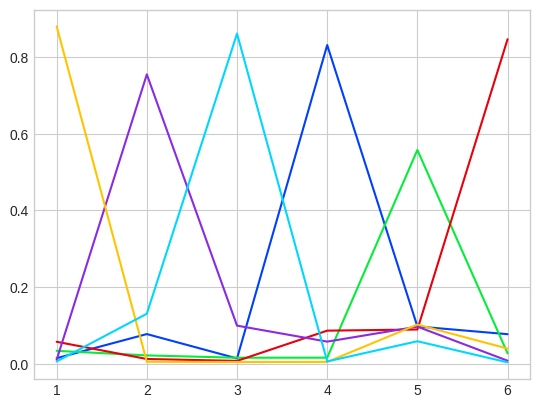

In [ ]:

membership = np.array(fcm_instance.get_membership())
species = tuple((str(i) for i in range(len(membership))))
weights = {str(i): np.array(arr) for i, arr in enumerate((membership.T))}
bottom = np.zeros(len(weights.get('0')))

#width = .7

fig, ax = plt.subplots()

i = 0

col = list(range(1, 7))

for boolean, w in weights.items():
    #if i == 2:
    # p = ax.bar(species, w, width, label=boolean, bottom=bottom)
    bottom += w
    i += 1

membership_kpca = KernelPCA(3, kernel='rbf', gamma=0.5, alpha=5, fit_inverse_transform=True)
X_mpca = membership_kpca.fit_transform(membership)


initial_membership_centers = kmpp_init(membership, len(membership[0]), kmpp_init.FARTHEST_CENTER_CANDIDATE).initialize()
membership_fcm = fcm(membership, initial_membership_centers)
membership_fcm.process()

plt.plot(col , membership_fcm.get_centers())


# ax2 = plt.subplot(projection="3d")
# ax2.scatter(X_mpca[:,2], X_mpca[:,0], X_mpca[:,1], cmap='cool')

ax.legend(loc="upper right")
